In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from math import ceil

2023-05-11 07:27:56.418995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
ls /content/drive/'My Drive'/'RMIT PROGRAMMING'/'Machine Learning A2'/

In [ ]:
cd /content/drive/'My Drive'/'RMIT PROGRAMMING'/'Machine Learning A2'/

In [ ]:
ls

In [ ]:
pwd

In [28]:
dfMain = pd.read_csv('Image_classification_data/data_labels_mainData.csv')
dfExtra = pd.read_csv('Image_classification_data/data_labels_extraData.csv')
dfJoined = pd.concat([dfMain, dfExtra])
display(dfJoined)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0.0,0
1,22406,1,22406.png,fibroblast,0.0,0
2,22407,1,22407.png,fibroblast,0.0,0
3,22408,1,22408.png,fibroblast,0.0,0
4,22409,1,22409.png,fibroblast,0.0,0
...,...,...,...,...,...,...
10379,20028,99,20028.png,NaN,NaN,0
10380,20029,99,20029.png,NaN,NaN,0
10381,20030,99,20030.png,NaN,NaN,0
10382,20031,99,20031.png,NaN,NaN,0


In [29]:
dfJoined.shape

(20280, 6)

In [30]:
dfJoined.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0.0,0
1,22406,1,22406.png,fibroblast,0.0,0
2,22407,1,22407.png,fibroblast,0.0,0
3,22408,1,22408.png,fibroblast,0.0,0
4,22409,1,22409.png,fibroblast,0.0,0


In [31]:
dfJoined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InstanceID    20280 non-null  int64  
 1   patientID     20280 non-null  int64  
 2   ImageName     20280 non-null  object 
 3   cellTypeName  9896 non-null   object 
 4   cellType      9896 non-null   float64
 5   isCancerous   20280 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [32]:
dfJoined.describe()

,InstanceID,patientID,cellType,isCancerous
count,20280.000000,20280.000000,9896.000000,20280.000000
mean,11163.660848,55.681065,1.501516,0.348570
std,6481.457867,28.891837,0.954867,0.476529
min,1.000000,1.000000,0.000000,0.000000
25%,5551.750000,29.000000,1.000000,0.000000
50%,11111.500000,63.000000,2.000000,0.000000
75%,16756.250000,81.000000,2.000000,1.000000
max,22444.000000,99.000000,3.000000,1.000000


In [33]:
dfJoined.dtypes

InstanceID        int64
patientID         int64
ImageName        object
cellTypeName     object
cellType        float64
isCancerous       int64
dtype: object

In [34]:
dfJoined.columns

Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')

In [35]:
dfJoined.isnull().sum()

InstanceID          0
patientID           0
ImageName           0
cellTypeName    10384
cellType        10384
isCancerous         0
dtype: int64

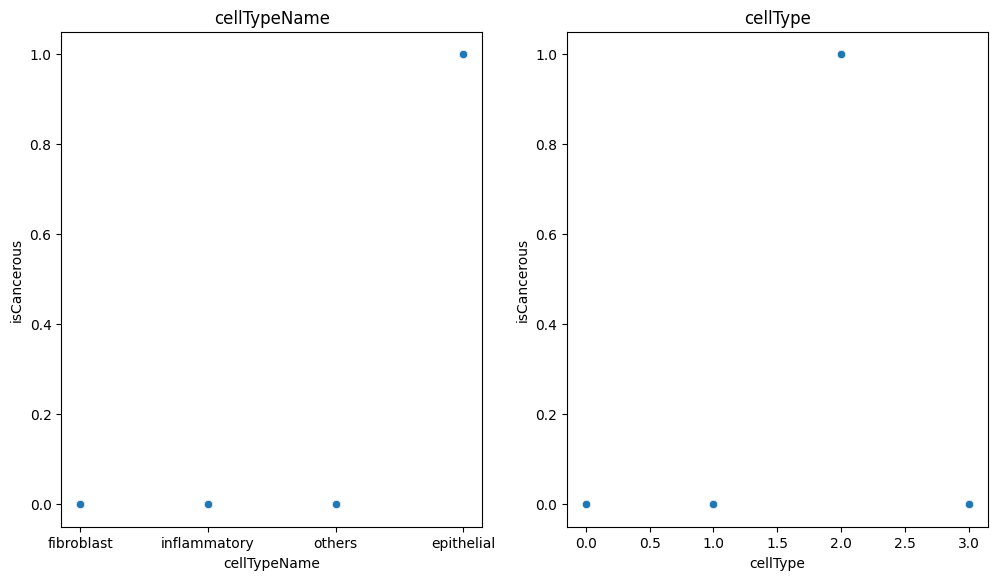

In [38]:
plt.figure(figsize=(25,45))
plt.subplot(6,4,1)
sns.scatterplot(data=dfMain, x=dfMain['cellTypeName'], y='isCancerous')
plt.title('cellTypeName')
plt.xticks(rotation='horizontal')

# Not sure what this is actually showing 
plt.subplot(6,4,2)
sns.scatterplot(data=dfJoined, x=dfJoined['cellType'], y='isCancerous')
plt.title('cellType')
plt.xticks(rotation='horizontal')
plt.show()

<Axes: xlabel='Is Cancerous'>

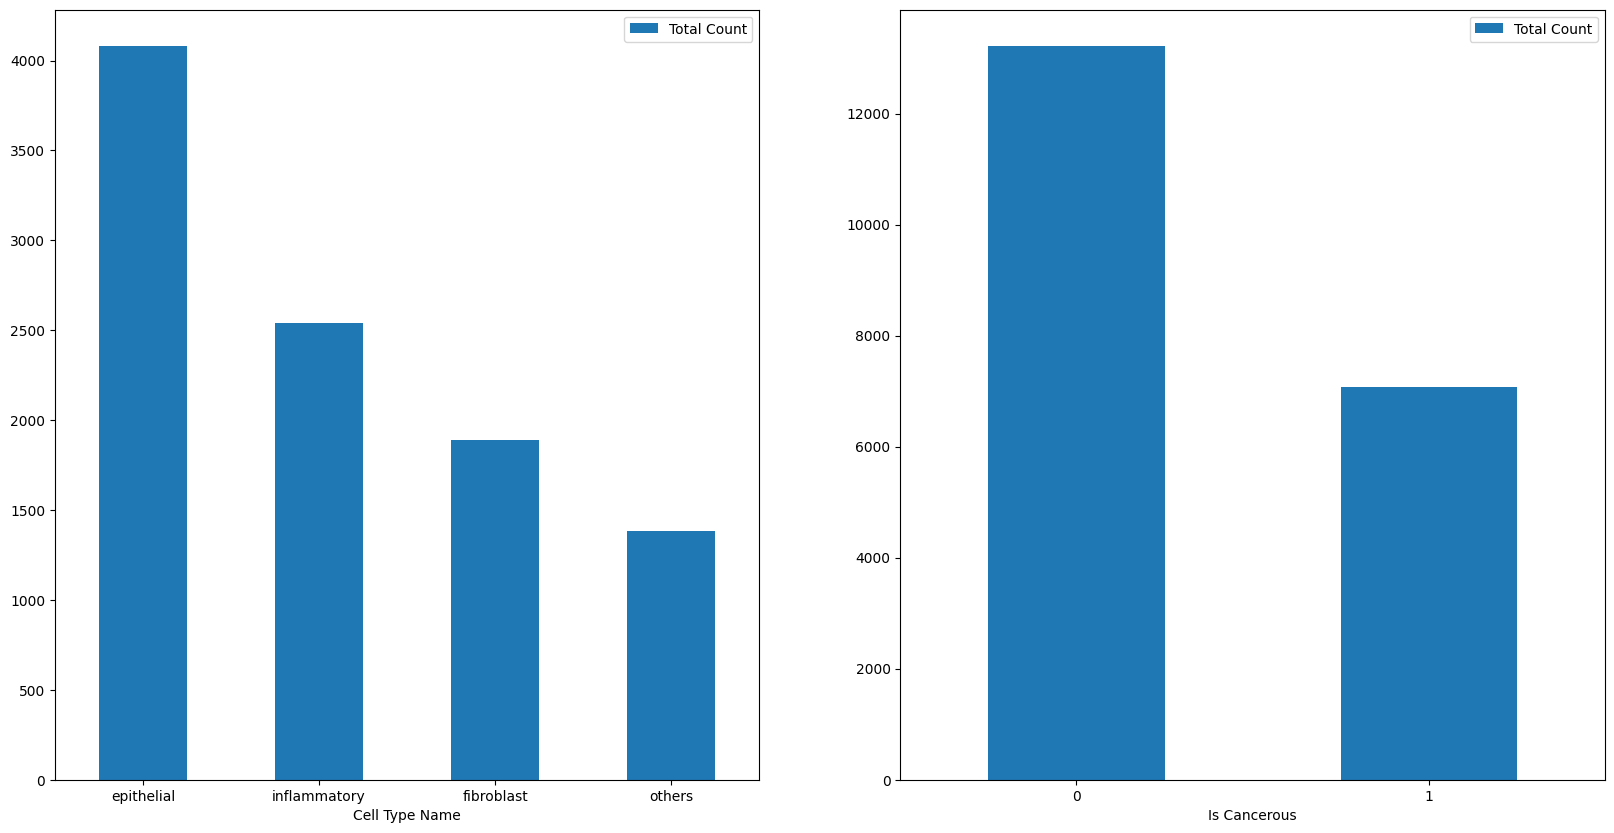

In [323]:
dfCellCounts = pd.DataFrame(dfMain.cellTypeName.value_counts().reset_index().values, columns=['Cell Type Name', 'Total Count'])
dfCancerousCounts = pd.DataFrame(dfJoined.isCancerous.value_counts().reset_index().values, columns=['Is Cancerous', 'Total Count'])
dfPatientImagesCount = pd.DataFrame(dfJoined.patientID.value_counts().reset_index().values, columns=['Patient ID', 'Total Images for Patient'])
dfPatientImagesCount = dfPatientImagesCount.sort_values('Patient ID', ascending=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
dfCellCounts.plot(kind='bar', x='Cell Type Name', y='Total Count', ax=axes[0], rot=0)
dfCancerousCounts.plot(kind='bar', x='Is Cancerous', y='Total Count', ax=axes[1], rot=0)

<Axes: xlabel='Patient ID'>

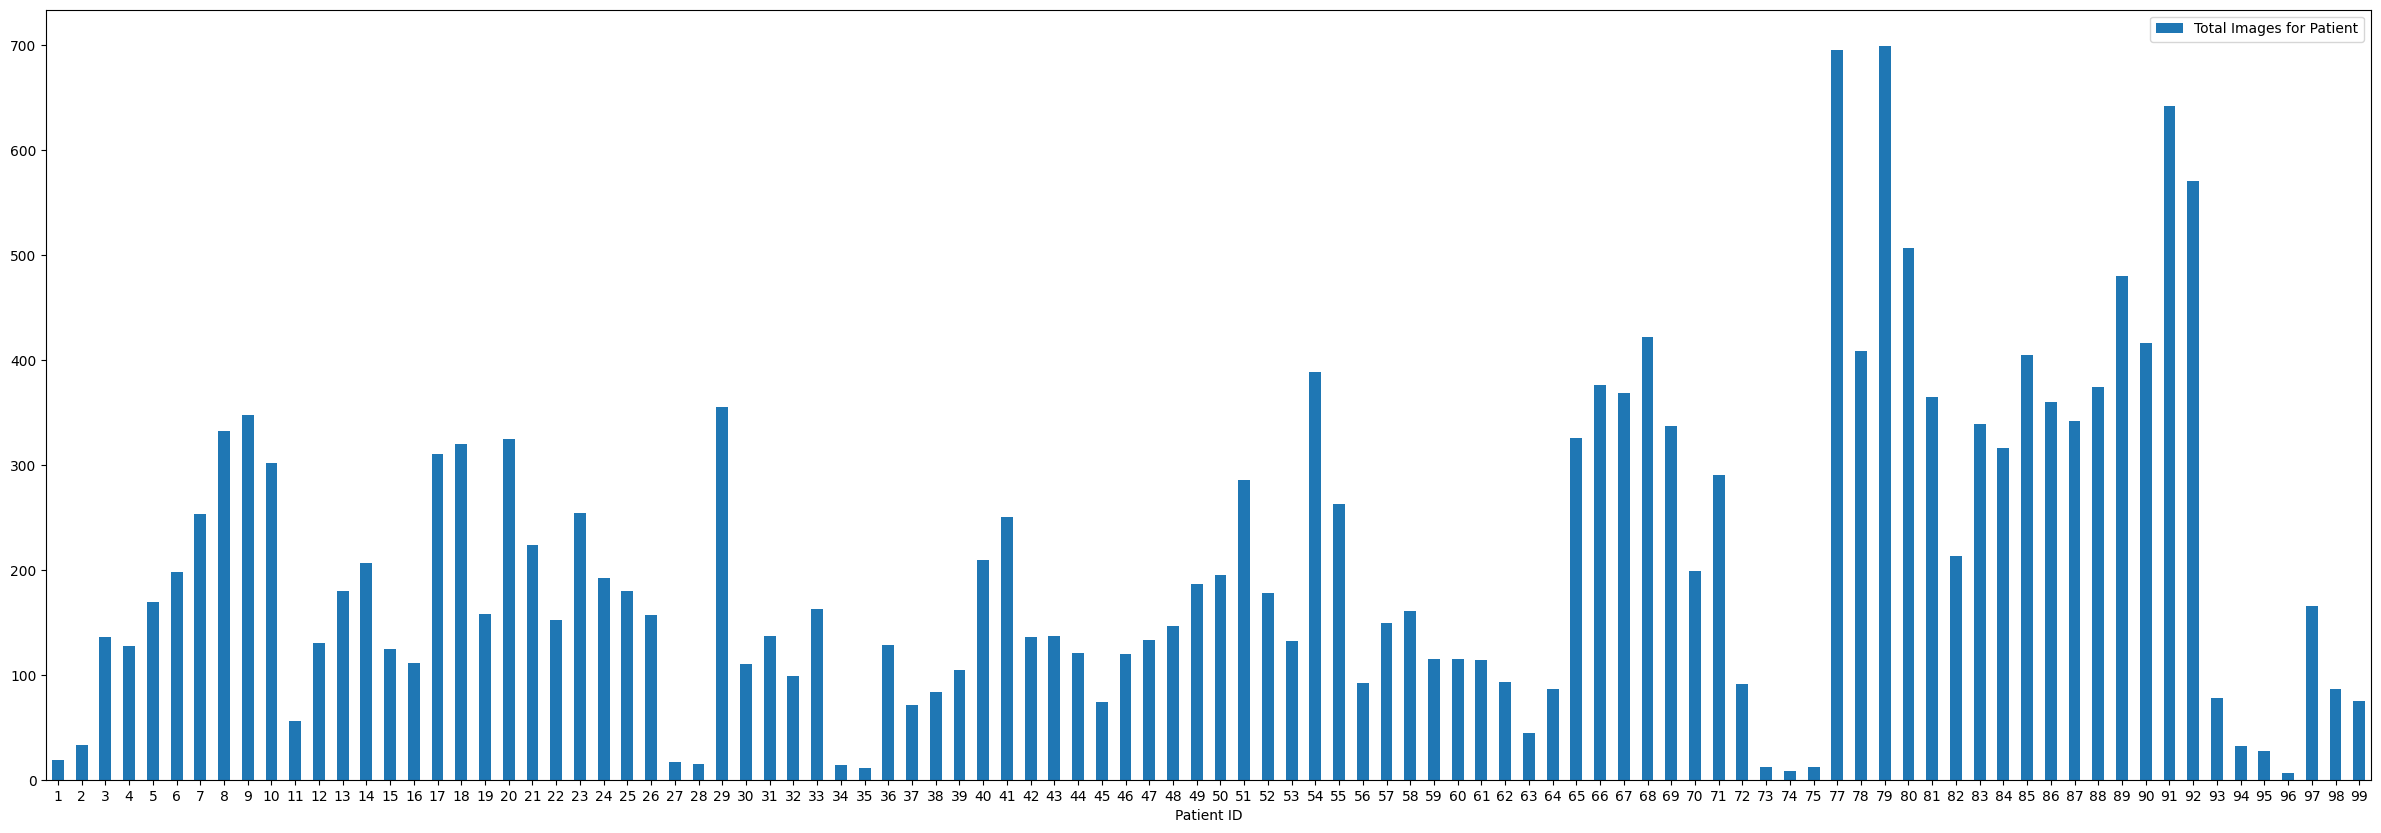

In [322]:
# fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
dfPatientImagesCount.plot(kind='bar', x='Patient ID', y='Total Images for Patient', figsize=(30, 10), rot=0)

In [324]:
dfEpithelial = df.loc[df['cellTypeName'] == 'epithelial']
dfInflammatory = df.loc[df['cellTypeName'] == 'inflammatory']
dfFibroblast = df.loc[df['cellTypeName'] == 'fibroblast']
dfOthers= df.loc[df['cellTypeName'] == 'others']

In [325]:
cancerous = df.loc[df['isCancerous'] == 1]
non_cancerous = df.loc[df['isCancerous'] == 0]
print(cancerous.equals(epithelial))

False


In [42]:
### ANDREW's PART ###

In [51]:
path = 'Image_classification_data/patch_images/' # image folder

In [43]:
dfIsCancerous = dfJoined.loc[dfJoined['isCancerous'] == 1]
print(dfIsCancerous)

      InstanceID  patientID ImageName cellTypeName  cellType  isCancerous
449          276          5   276.png   epithelial       2.0            1
450          277          5   277.png   epithelial       2.0            1
451          278          5   278.png   epithelial       2.0            1
452          279          5   279.png   epithelial       2.0            1
453          280          5   280.png   epithelial       2.0            1
...          ...        ...       ...          ...       ...          ...
7800        7667         88  7667.png          NaN       NaN            1
7801        7668         88  7668.png          NaN       NaN            1
7802        7669         88  7669.png          NaN       NaN            1
7803        7670         88  7670.png          NaN       NaN            1
7804        7671         88  7671.png          NaN       NaN            1

[7069 rows x 6 columns]


In [44]:
dfNotCancerous = dfJoined.loc[dfJoined['isCancerous'] == 0]
print(dfNotCancerous)

       InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0           22405          1  22405.png   fibroblast       0.0            0
1           22406          1  22406.png   fibroblast       0.0            0
2           22407          1  22407.png   fibroblast       0.0            0
3           22408          1  22408.png   fibroblast       0.0            0
4           22409          1  22409.png   fibroblast       0.0            0
...           ...        ...        ...          ...       ...          ...
10379       20028         99  20028.png          NaN       NaN            0
10380       20029         99  20029.png          NaN       NaN            0
10381       20030         99  20030.png          NaN       NaN            0
10382       20031         99  20031.png          NaN       NaN            0
10383       20032         99  20032.png          NaN       NaN            0

[13211 rows x 6 columns]


In [45]:
nonCancerous = dfNotCancerous['ImageName'].tolist()
isCancerous = dfIsCancerous['ImageName'].tolist()

In [233]:
# randomly select 10 of each image from non-cancerous and cancerous lists
select_nonCancerous = np.random.choice(nonCancerous, 10, replace = False)
select_isCancerous = np.random.choice(isCancerous, 10, replace = False)

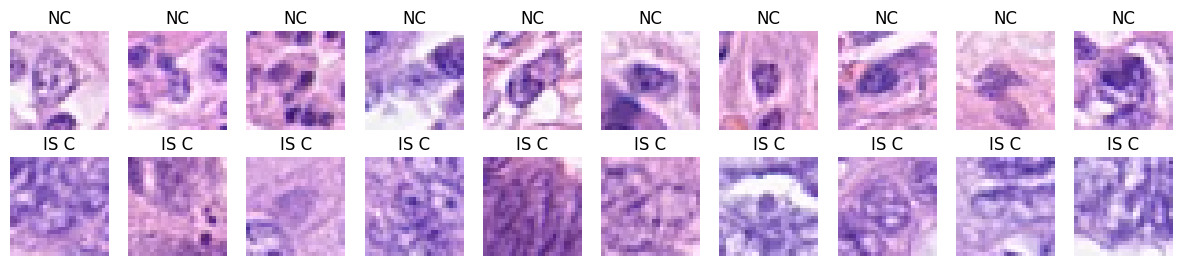

In [254]:
fig = plt.figure(figsize = (15,3))
rows = 2
columns = 12

for i in range(20):
    if i < 10:
        fp = path + select_nonCancerous[i]
        label = 'NC'
    else:
        fp = path + select_isCancerous[i-10]
        label = 'IS C'
        
    ax = fig.add_subplot(2, 10, i+1)
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

In [252]:
epithelial = dfEpithelial['ImageName'].tolist()
inflammatory = dfInflammatory['ImageName'].tolist()
fibroblast = dfFibroblast['ImageName'].tolist()
others= dfOthers['ImageName'].tolist()

# # randomly select 10 of each image from each cell type name
selectEpithelial = np.random.choice(epithelial, 10, replace = False)
selectInflammatory = np.random.choice(inflammatory, 10, replace = False)
selectFibroblast = np.random.choice(fibroblast, 10, replace = False)
selectOthers = np.random.choice(others, 10, replace = False)

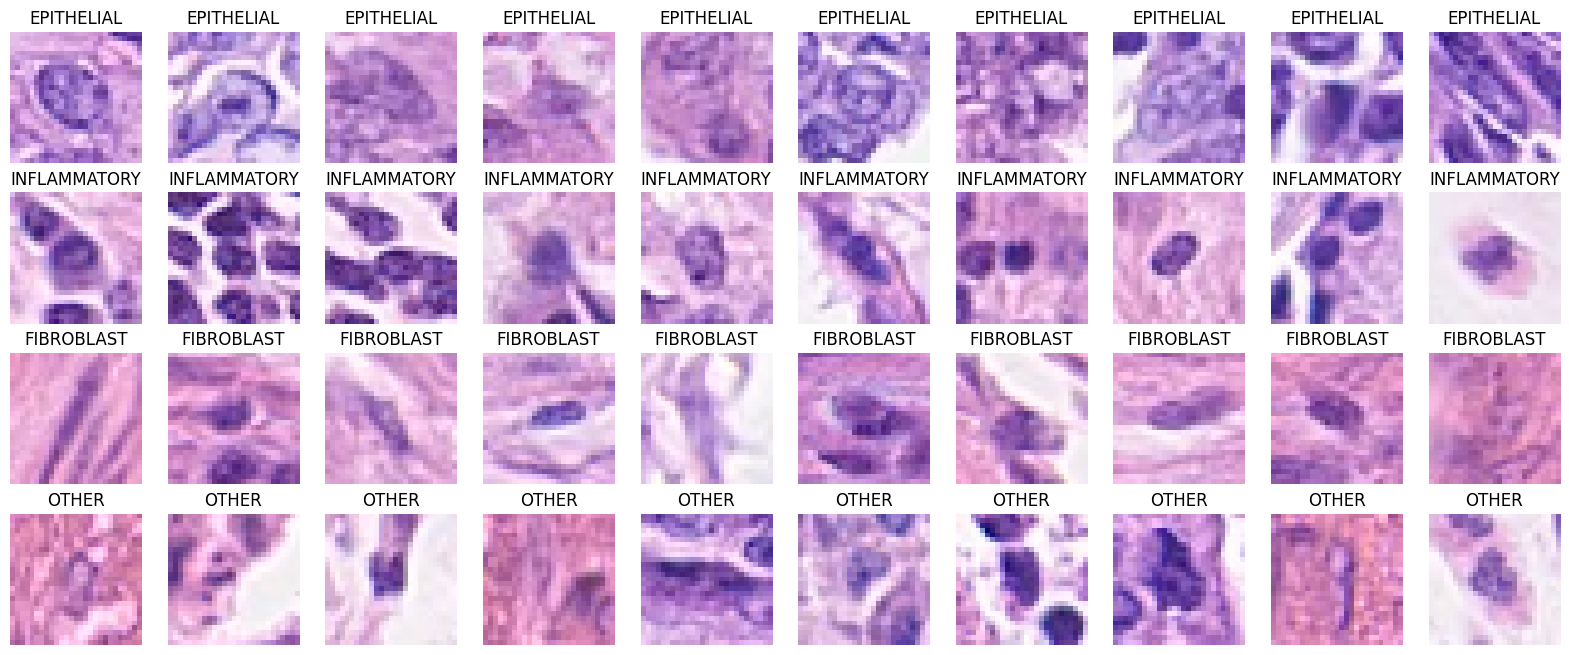

In [263]:
fig = plt.figure(figsize = (20,8))
rows = 4
columns = 12

for i in range(40):
    if i < 10:
        fp = path + selectEpithelial[i]
        label = 'EPITHELIAL'
    elif i < 20 :
        fp = path + selectInflammatory[i-10]
        label = 'INFLAMMATORY'
    elif i < 30 :
        fp = path + selectFibroblast[i-20]
        label = 'FIBROBLAST'
    elif i < 40 :
        fp = path + selectOthers[i-30]
        label = 'OTHER'
        
    ax = fig.add_subplot(4, 10, i+1)
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

In [219]:
def image2Matrix(path, listOfFiles, size = (27,27)):
    for file in listOfFiles:
        filePath = path + file
        currentImage = image.load_img(filePath, target_size=size, color_mode='grayscale')
        
        image_matrix = image.img_to_array(currentImage)
        image_matrix = [image_matrix.ravel()]
        
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, image_matrix))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = image_matrix
    return full_mat

nonCancerousImages = image2Matrix(path, nonCancerous)
isCancerousImages = image2Matrix(path, isCancerous)
# isCancerousImages = image2Matrix(path, isCancerous)

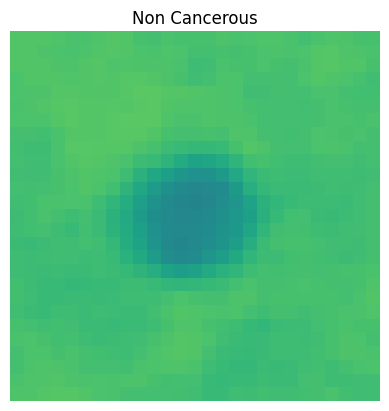

In [235]:
def averageImage(full_mat, title, size = (27,27)):
    
    meanImage = np.mean(full_mat, axis = 0)
    meanImage = meanImage.reshape(size)
    plt.imshow(meanImage, vmin=0, vmax=255, cmap='viridis')
    plt.title(title)
    plt.axis('off')
    return meanImage

nonCancerousMean = averageImage(nonCancerousImages, 'Non Cancerous')

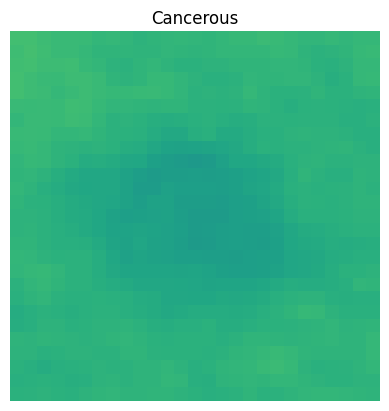

In [236]:
isCancerousMean = averageImage(isCancerousImages, 'Cancerous')

In [103]:
# def averageImage(axes, full_mat, title, size = (27,27)):
#     fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
#     meanImage = np.mean(full_mat, axis = 0)
#     meanImage = meanImage.reshape(size)
    
#     if axes == 1:
#         ax1.imshow(meanImage, vmin=0, vmax=255, cmap='viridis')
#         ax1.set_title(title)
#         ax1.axis('off')
#     else:
#         ax2.imshow(meanImage, vmin=0, vmax=255, cmap='viridis')
#         ax2.set_title(title)
#         ax2.axis('off')
#     return meanImage



# nonCancerousMean = averageImage(1, nonCancerousImages, 'Non Cancerous')
# isCancerousMean = averageImage(2, isCancerousImages, 'Cancerous')

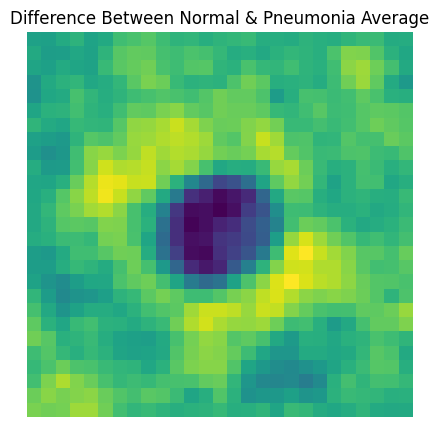

In [247]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
contrast_mean = nonCancerousMean - isCancerousMean
plt.imshow(contrast_mean, cmap='viridis')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()